In [1]:
%matplotlib inline
import random
from mxnet import autograd, np, npx
from d2l import mxnet as d2l

npx.set_np()

In [7]:
def synthetic_data(w, b, num_examples):  #@save
    """生成y=Xw+b+噪声"""
    X = np.random.normal(0, 1, (num_examples, len(w)))
    y = np.dot(X, w) + b
    y += np.random.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = np.array([2, -3.4]) # 生成2.-3.4的权重
true_b = 4.2 # 偏置
features, labels = synthetic_data(true_w, true_b, 1000)

In [8]:
print('features:', features[0],'\nlabel:', labels[0])

features: [-0.31961164  1.6160865 ] 
label: [-1.9110922]


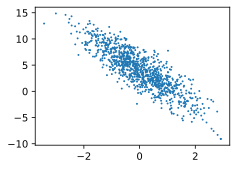

In [63]:
d2l.set_figsize()
d2l.plt.scatter(features[:, (1)].asnumpy(), labels.asnumpy(), 1);  #绘制散点图

In [97]:
#读取数据
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 这些样本是随机读取的，没有特定的顺序
    random.shuffle(indices)
    # print(num_examples, batch_size)
    # print(range(0, num_examples, batch_size))
    # 步长为10，总样本个数为1000， 所以遍历运行100次
    for i in range(0, num_examples, batch_size):
        batch_indices = np.array(
            indices[i: min(i + batch_size, num_examples)])# 随机产生 index
        yield features[batch_indices], labels[batch_indices] # 返回一组

In [98]:


for X, y in data_iter(batch_size, features, labels):
    # print(y)
    break

In [170]:
def linreg(X, w, b):  #@save
    """线性回归模型"""
    return np.dot(X, w) + b

def squared_loss(y_hat, y):  #@save
    """均方损失"""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [125]:
# lr为学习率 param.grad 表示梯度
def sgd(params, lr, batch_size):  #@save
    """小批量随机梯度下降"""
    for param in params:
        # print("sgd", param, "\n")
        param[:] = param - lr * param.grad / batch_size # 更新w 、 b 参数，利用的是 w - 学习率 * 梯度之和 / 小批量大小

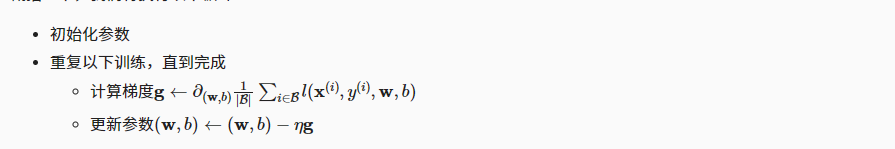

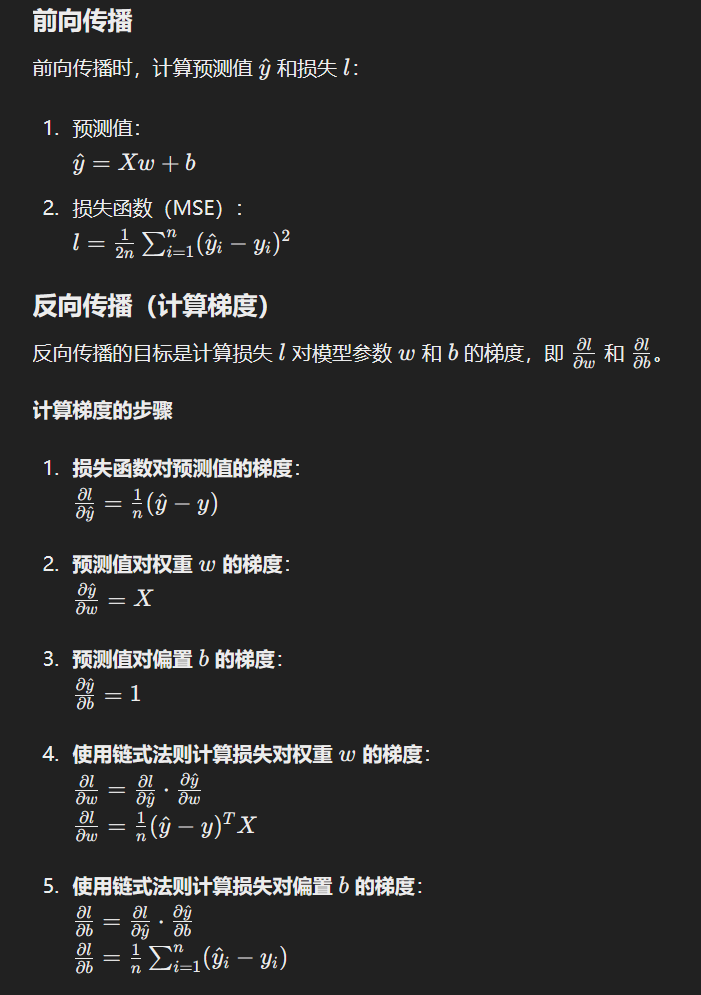

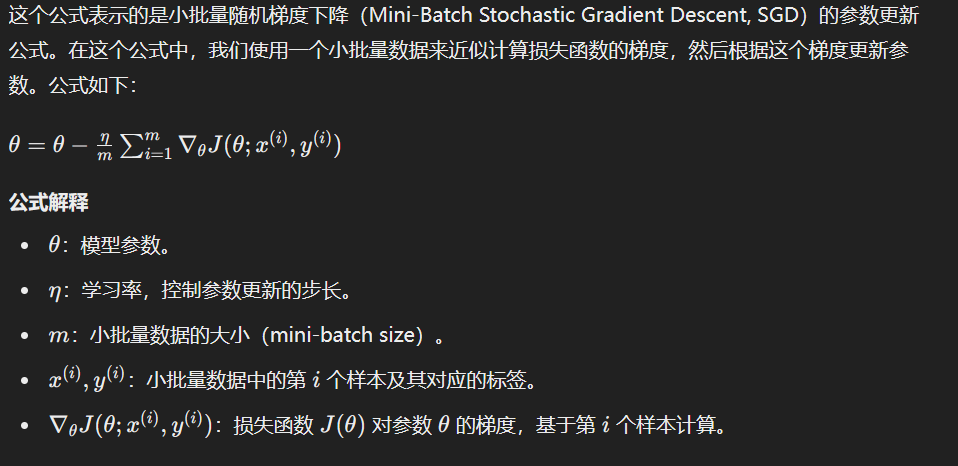
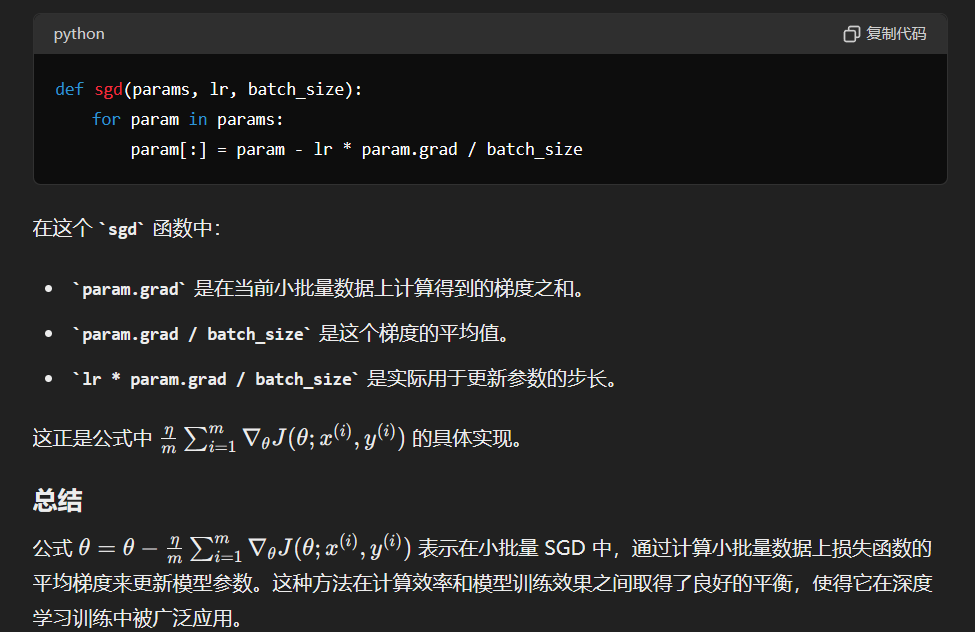

In [186]:
# 如上是训练步骤
lr = 0.1
num_epochs = 3 # 训练多少次
net = linreg
loss = squared_loss # 损失函数
count = 0

# 给权重和偏置赋初值
w = np.random.normal(0, 0.01, (2, 1))
# w = np.zeros((2, 1))
b = np.zeros(1)
w.attach_grad()
b.attach_grad()

batch_size = 5
# print(w.attach_grad(), b.attach_grad())

# 用于记录训练过程中的参数和损失值
w_values = []
b_values = []
loss_values = []

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        with autograd.record():
            l = loss(net(X, w, b), y)  # X和y的小批量损失，计算小批量的损失，并通过这个去计算梯度
        # 计算l关于[w,b]的梯度
        l.backward()
        sgd([w, b], lr, batch_size)  # 使用参数的梯度更新参数
        
        # 记录参数和损失值
        w_values.append(w.asnumpy().flatten().tolist())
        b_values.append(b.item())
        loss_values.append(float(l.mean().item()))
        
    train_l = loss(net(features, w, b), labels)
    # print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

In [187]:
print(w, b)
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

[[ 2.0005527]
 [-3.3988054]] [4.200456]
w的估计误差: [-0.00055265 -0.00119472]
b的估计误差: [-0.00045633]


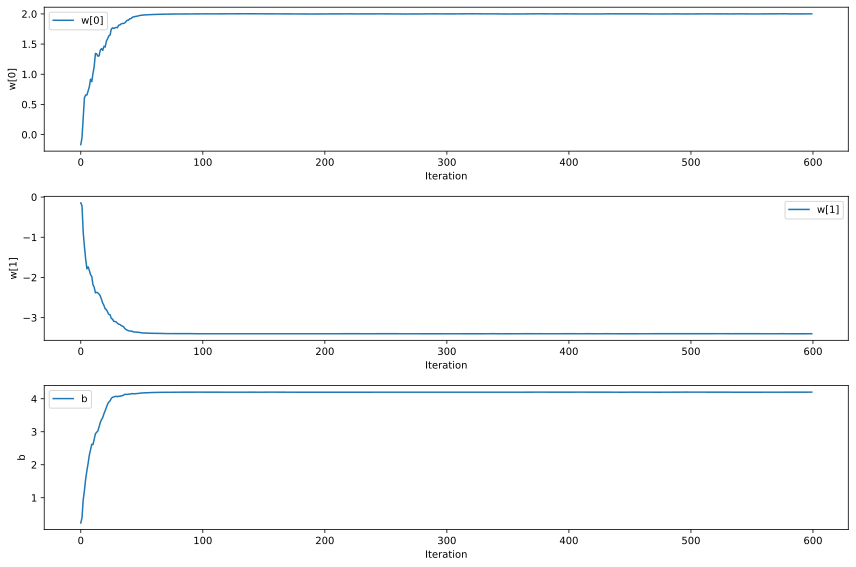

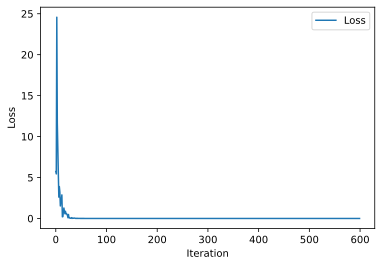

In [188]:
# 绘制参数和损失值的变化
epochs = list(range(len(w_values)))

d2l.plt.figure(figsize=(12, 8))

d2l.plt.subplot(3, 1, 1)
d2l.plt.plot(epochs, [w[0] for w in w_values], label='w[0]')
d2l.plt.xlabel('Iteration')
d2l.plt.ylabel('w[0]')
d2l.plt.legend()

d2l.plt.subplot(3, 1, 2)
d2l.plt.plot(epochs, [w[1] for w in w_values], label='w[1]')
d2l.plt.xlabel('Iteration')
d2l.plt.ylabel('w[1]')
d2l.plt.legend()

d2l.plt.subplot(3, 1, 3)
d2l.plt.plot(epochs, b_values, label='b')
d2l.plt.xlabel('Iteration')
d2l.plt.ylabel('b')
d2l.plt.legend()

d2l.plt.tight_layout()
d2l.plt.show()

d2l.plt.figure(figsize=(6, 4))
d2l.plt.plot(epochs, loss_values, label='Loss')
d2l.plt.xlabel('Iteration')
d2l.plt.ylabel('Loss')
d2l.plt.legend()
d2l.plt.show()